In [3]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with rasterio.open("2025/MOD_NDVI_M_2025-01-01_rgb_720x360.FLOAT.tiff") as src:
    ndvi_2025 = src.read(1)
with rasterio.open("2005/MOD_NDVI_M_2005-12-01_rgb_720x360.FLOAT.tiff") as src:
    ndvi_2005 = src.read(1)


In [5]:
ndvi_2025 = ndvi_2025.astype(float)
ndvi_2005 = ndvi_2005.astype(float)

In [6]:
print(np.isnan(ndvi_2025).sum())
print(np.isnan(ndvi_2005).sum())

0
0


In [7]:
ndvi_diff_inc = ndvi_2025 - ndvi_2005
ndvi_diff_inc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(360, 720))

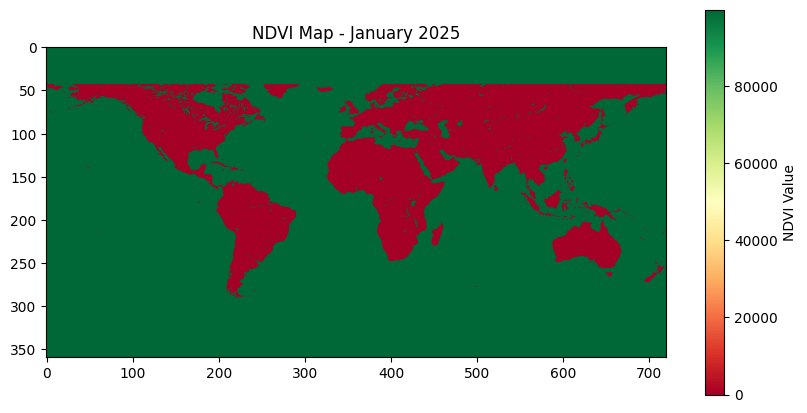

In [8]:
plt.figure(figsize=(10, 5))
plt.imshow(ndvi_2025, cmap='RdYlGn')
plt.title("NDVI Map - January 2025")
plt.colorbar(label="NDVI Value")
plt.show()


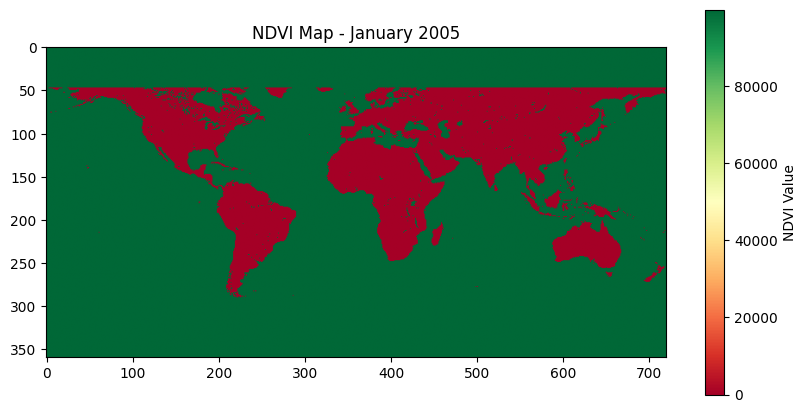

In [9]:
plt.figure(figsize=(10, 5))
plt.imshow(ndvi_2005, cmap='RdYlGn')
plt.title("NDVI Map - January 2005")
plt.colorbar(label="NDVI Value")
plt.show()


Scale seems to be off

In [10]:
print("Min:", np.nanmin(ndvi_2005))
print("Max:", np.nanmax(ndvi_2005))
print("Min:", np.nanmin(ndvi_2025))
print("Max:", np.nanmax(ndvi_2025))


Min: -0.10000000149011612
Max: 99999.0
Min: -0.10000000149011612
Max: 99999.0


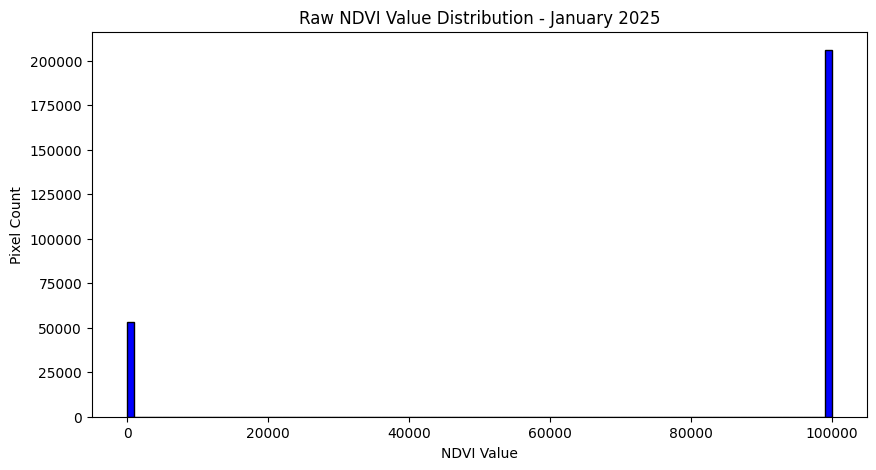

In [11]:
ndvi_flat_2025 = ndvi_2025.flatten()

plt.figure(figsize=(10,5))
plt.hist(ndvi_flat_2025, bins=100, color='blue', edgecolor='black')
plt.title("Raw NDVI Value Distribution - January 2025")
plt.xlabel("NDVI Value")
plt.ylabel("Pixel Count")
plt.show()

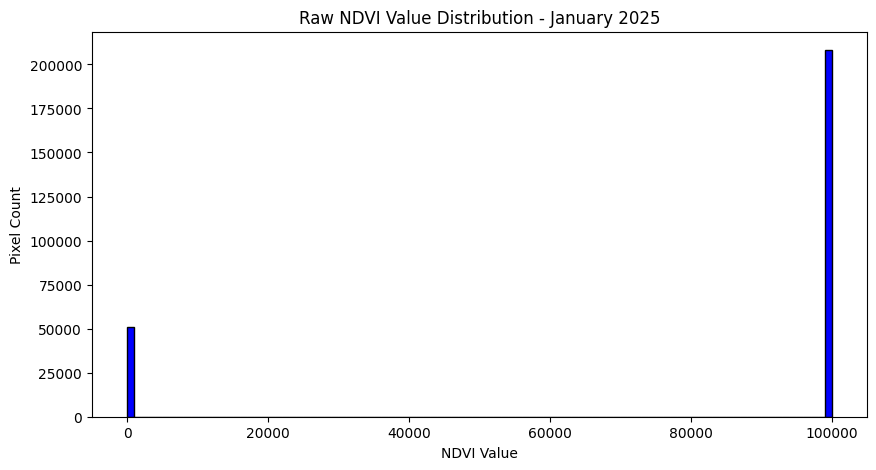

In [12]:
ndvi_flat_2005 = ndvi_2005.flatten()

plt.figure(figsize=(10,5))
plt.hist(ndvi_flat_2005, bins=100, color='blue', edgecolor='black')
plt.title("Raw NDVI Value Distribution - January 2025")
plt.xlabel("NDVI Value")
plt.ylabel("Pixel Count")
plt.show()

Distribution doesn't make sense, high max value is likely placeholders. Changing them to NaN

In [13]:
ndvi_2025 = np.where(ndvi_2025 == 99999, np.nan, ndvi_2025)
ndvi_2005 = np.where(ndvi_2005 == 99999, np.nan, ndvi_2005)

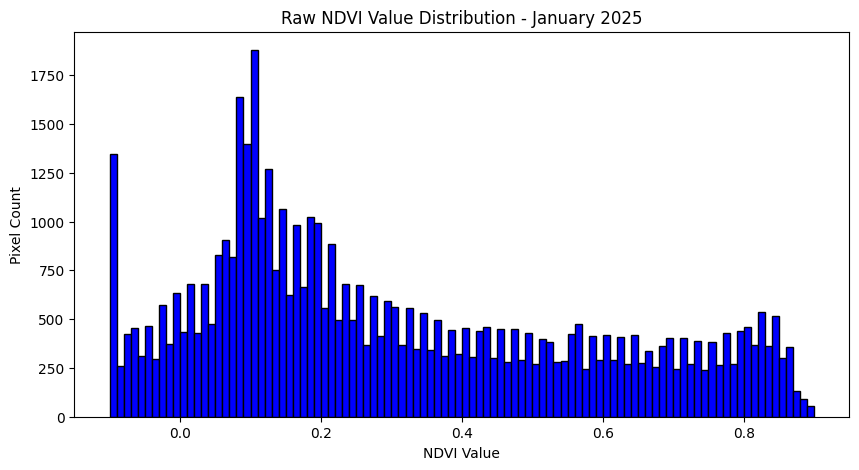

In [14]:
ndvi_flat_2005 = ndvi_2005.flatten()

plt.figure(figsize=(10,5))
plt.hist(ndvi_flat_2005, bins=100, color='blue', edgecolor='black')
plt.title("Raw NDVI Value Distribution - January 2025")
plt.xlabel("NDVI Value")
plt.ylabel("Pixel Count")
plt.show()

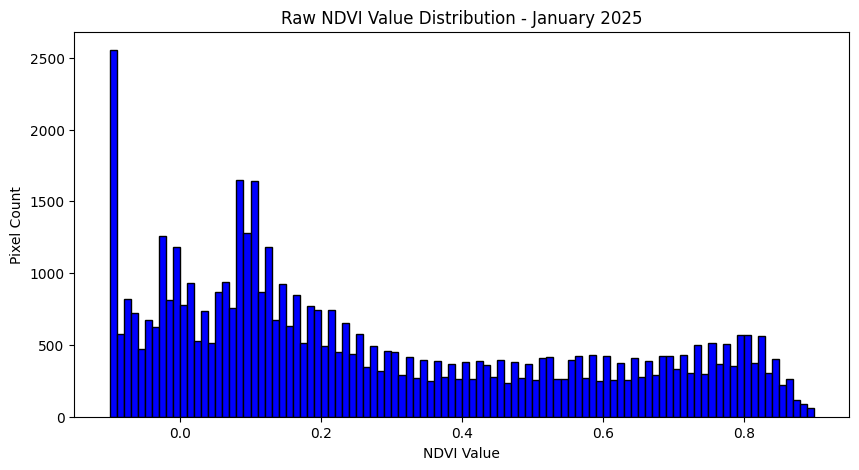

In [15]:
ndvi_flat_2025 = ndvi_2025.flatten()

plt.figure(figsize=(10,5))
plt.hist(ndvi_flat_2025, bins=100, color='blue', edgecolor='black')
plt.title("Raw NDVI Value Distribution - January 2025")
plt.xlabel("NDVI Value")
plt.ylabel("Pixel Count")
plt.show()

Distribution now makes a lot more sense

In [16]:
print(np.nanmin(ndvi_2025))
print(np.nanmax(ndvi_2025))


-0.10000000149011612
0.8999999761581421


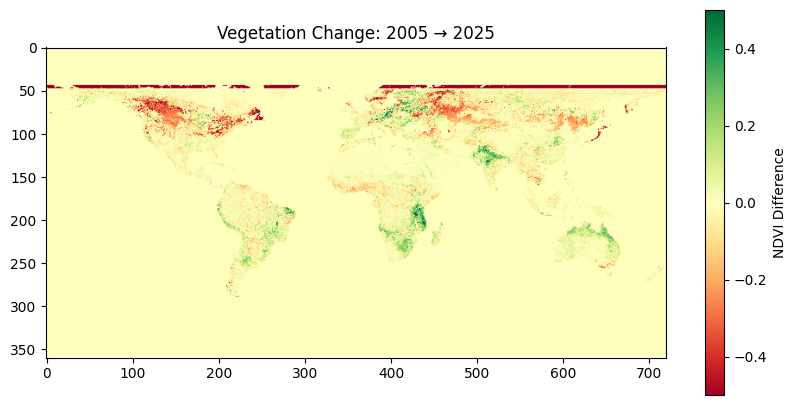

In [17]:
ndvi_diff = ndvi_2025 - ndvi_2005

plt.figure(figsize=(10, 5))
plt.imshow(ndvi_diff_inc, cmap='RdYlGn', vmin=-0.5, vmax=0.5)
plt.title("Vegetation Change: 2005 → 2025")
plt.colorbar(label="NDVI Difference")
plt.show()


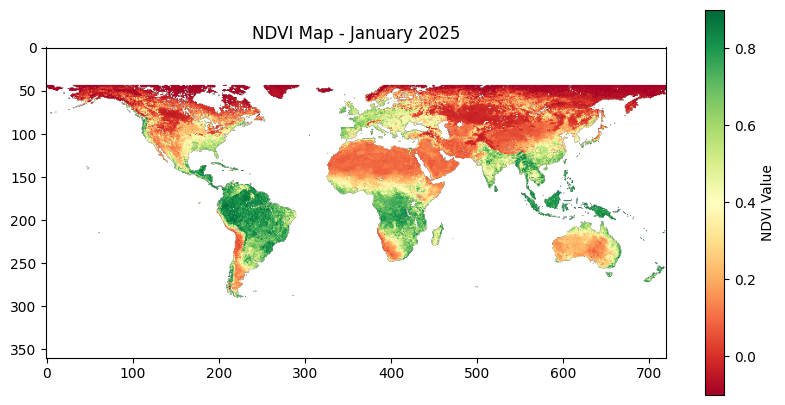

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(ndvi_2025, cmap='RdYlGn')
plt.title("NDVI Map - January 2025")
plt.colorbar(label="NDVI Value")
plt.show()


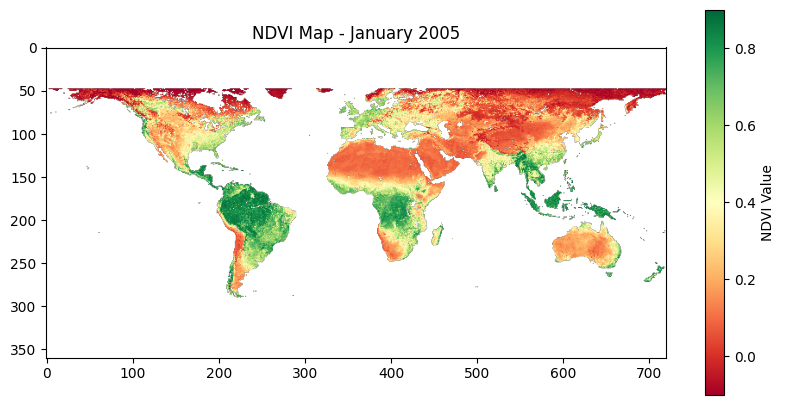

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(ndvi_2005, cmap='RdYlGn')
plt.title("NDVI Map - January 2005")
plt.colorbar(label="NDVI Value")
plt.show()

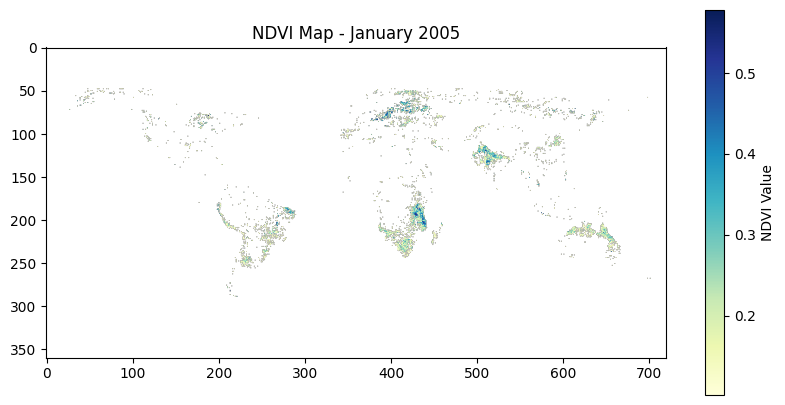

In [20]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

ndvi_diff_inc_clipped = np.where(ndvi_diff > 0.1, ndvi_diff, np.nan)

vmin = np.nanmin(ndvi_diff_inc_clipped)  
vmax = np.nanmax(ndvi_diff_inc_clipped)

fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(ndvi_diff_inc_clipped, vmin=vmin, vmax=vmax, cmap='YlGnBu')
ax.set_title("NDVI Map - January 2005")

sm = ScalarMappable(cmap='YlGnBu', norm=Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label="NDVI Value")


plt.show()

0.578000009059906
0.10199996829032898


<Axes: ylabel='Count'>

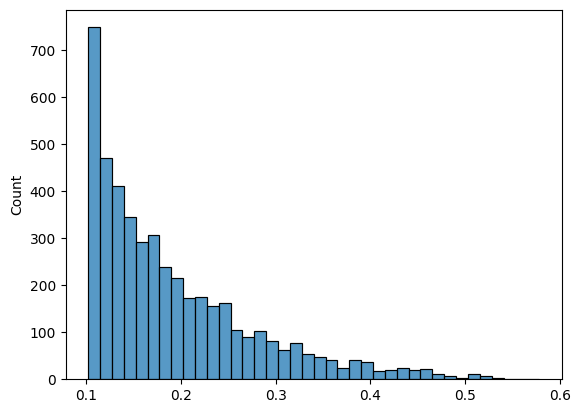

In [21]:
import seaborn as sns

ndvi_diff_inc_clipped = ndvi_diff_inc_clipped[~np.isnan(ndvi_diff_inc_clipped)] 
print(ndvi_diff_inc_clipped.max())
print(ndvi_diff_inc_clipped.min())
sns.histplot(ndvi_diff_inc_clipped.flatten())

<Axes: ylabel='Count'>

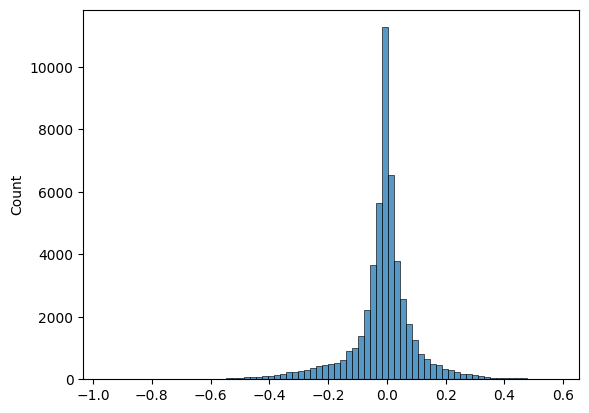

In [22]:
sns.histplot(ndvi_diff.flatten(), bins = 75)

In [23]:
from scipy.stats import skew, kurtosis

ndvi_diff_flat = ndvi_diff.flatten()
ndvi_diff_flat = ndvi_diff_flat[~np.isnan(ndvi_diff_flat)]

ndvi_diff_skewness = skew(ndvi_diff_flat)
ndvi_diff_kurt = kurtosis(ndvi_diff_flat)
ndvi_diff_mean = ndvi_diff_flat.mean()

print(f"Skew: {ndvi_diff_skewness}")
print(f"Kurtosis: {ndvi_diff_kurt}")
print(f"Mean: {ndvi_diff_mean}")

Skew: -0.6594163596014454
Kurtosis: 4.562419601663914
Mean: -0.012076431683035906


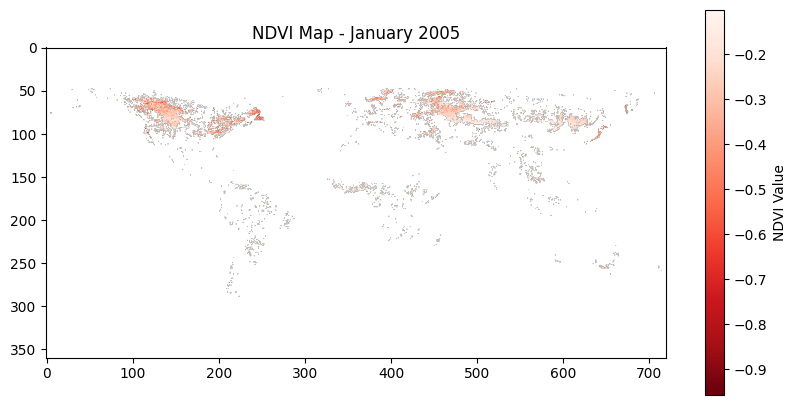

In [24]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

ndvi_diff_dec_clipped = np.where(ndvi_diff < -0.1, ndvi_diff, np.nan)

vmin = np.nanmin(ndvi_diff_dec_clipped)  
vmax = np.nanmax(ndvi_diff_dec_clipped)

fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(ndvi_diff_dec_clipped, vmin=vmin, vmax=vmax, cmap='Reds_r')
ax.set_title("NDVI Map - January 2005")

sm = ScalarMappable(cmap='Reds_r', norm=Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label="NDVI Value")


plt.show()

# Adding Bounding boxes for analysis by continent

for 2025

In [25]:
from rasterio.warp import transform_bounds
from rasterio.windows import from_bounds

bboxes = {
    "Africa_2025": (-18.5, -35.0, 51.5, 38.0),
    "Asia_2025": (26.0, -10.0, 180.0, 81.0),
    "Europe_2025": (-25.0, 34.0, 60.0, 72.0),
    "North_America_2025": (-170.0, 5.0, -50.0, 83.0),
    "South_America_2025": (-82.0, -56.0, -34.0, 13.0),
    "Australia_2025": (112.0, -45.0, 155.0, -10.0)
}

src_path = "2025/MOD_NDVI_M_2025-01-01_rgb_720x360.FLOAT.tiff"
ndvi_by_continent = {}

with rasterio.open(src_path) as src:
    src_crs = src.crs
    src_transform = src.transform
    src_h, src_w = ndvi_diff.shape

    for name, (minlon, minlat, maxlon, maxlat) in bboxes.items():
        if src_crs and src_crs.to_string() != "EPSG:4326":
            tb = transform_bounds("EPSG:4326", src_crs, minlon, minlat, maxlon, maxlat, densify_pts=21)
        else:
            tb = (minlon, minlat, maxlon, maxlat)

        win = from_bounds(*tb, transform=src_transform)
        win = win.round_offsets().round_lengths()
        row0, col0 = int(win.row_off), int(win.col_off)
        h, w = int(win.height), int(win.width)

        r0 = max(0, row0)
        c0 = max(0, col0)
        r1 = min(src_h, row0 + h)
        c1 = min(src_w, col0 + w)

        if r1 <= r0 or c1 <= c0 or h <= 0 or w <= 0:
            out = np.full((max(0, h), max(0, w)), np.nan, dtype=ndvi_diff.dtype)
        else:
            out = np.full((h, w), np.nan, dtype=ndvi_diff.dtype)
            src_window = ndvi_diff[r0:r1, c0:c1]
            dest_r0 = r0 - row0
            dest_c0 = c0 - col0
            out[dest_r0:dest_r0 + src_window.shape[0], dest_c0:dest_c0 + src_window.shape[1]] = src_window

        var_name = f"ndvi_{name}"
        globals()[var_name] = out
        ndvi_by_continent[name] = out


Split everything into 6 variables

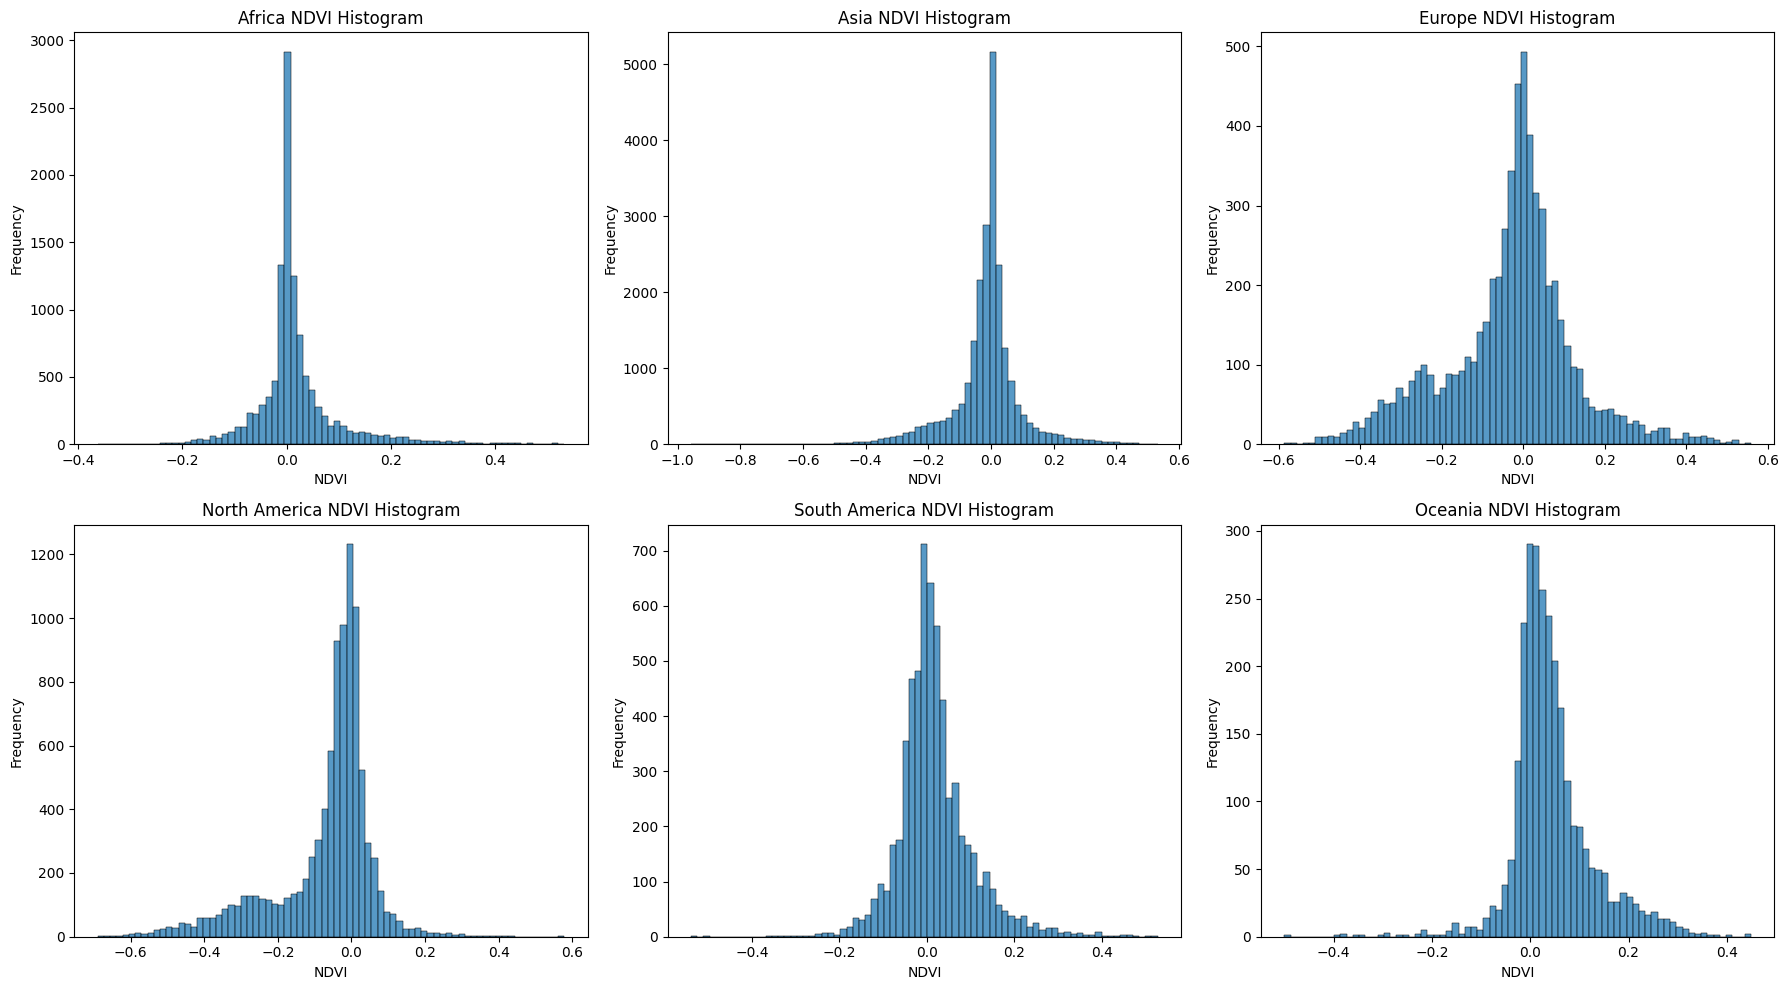

In [43]:
continents = {
    "Africa": ndvi_Africa_2025,
    "Asia": ndvi_Asia_2025,
    "Europe": ndvi_Europe_2025,
    "North America": ndvi_North_America_2025,
    "South America": ndvi_South_America_2025,
    "Oceania": ndvi_Australia_2025
}

# Create subplots grid (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (continent, ndvi_data) in enumerate(continents.items()):
    ndvi_flat = ndvi_data.flatten()
    ndvi_flat = ndvi_flat[~np.isnan(ndvi_flat)]  # Remove NaNs
    
    sns.histplot(ndvi_flat, bins=75, ax=axes[i])
    axes[i].set_title(f"{continent} NDVI Histogram")
    axes[i].set_xlabel("NDVI")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

for continent, ndvi_data in continents.items():
    ndvi_data_flat = ndvi_data.flatten()
    ndvi_data_flat = ndvi_data_flat[~np.isnan(ndvi_data_flat)]

    kurt = kurtosis(ndvi_data_flat)
    mean = ndvi_data_flat.mean()
    skewness = skew(ndvi_data_flat)
    print(continent)
    print(f"Mean for {continent}: {mean:.3f}")
    print(f"kurtosis for {continent}: {kurt:.3f}")
    print(f"skew for {continent}: {skewness:.3f}\n")

Africa
Mean for Africa: 0.018
kurtosis for Africa: 6.606
skew for Africa: 1.677

Asia
Mean for Asia: -0.013
kurtosis for Asia: 4.163
skew for Asia: -0.264

Europe
Mean for Europe: -0.031
kurtosis for Europe: 0.927
skew for Europe: -0.171

North America
Mean for North America: -0.069
kurtosis for North America: 2.167
skew for North America: -1.295

South America
Mean for South America: 0.018
kurtosis for South America: 4.020
skew for South America: 0.852

Oceania
Mean for Oceania: 0.045
kurtosis for Oceania: 3.938
skew for Oceania: 0.479



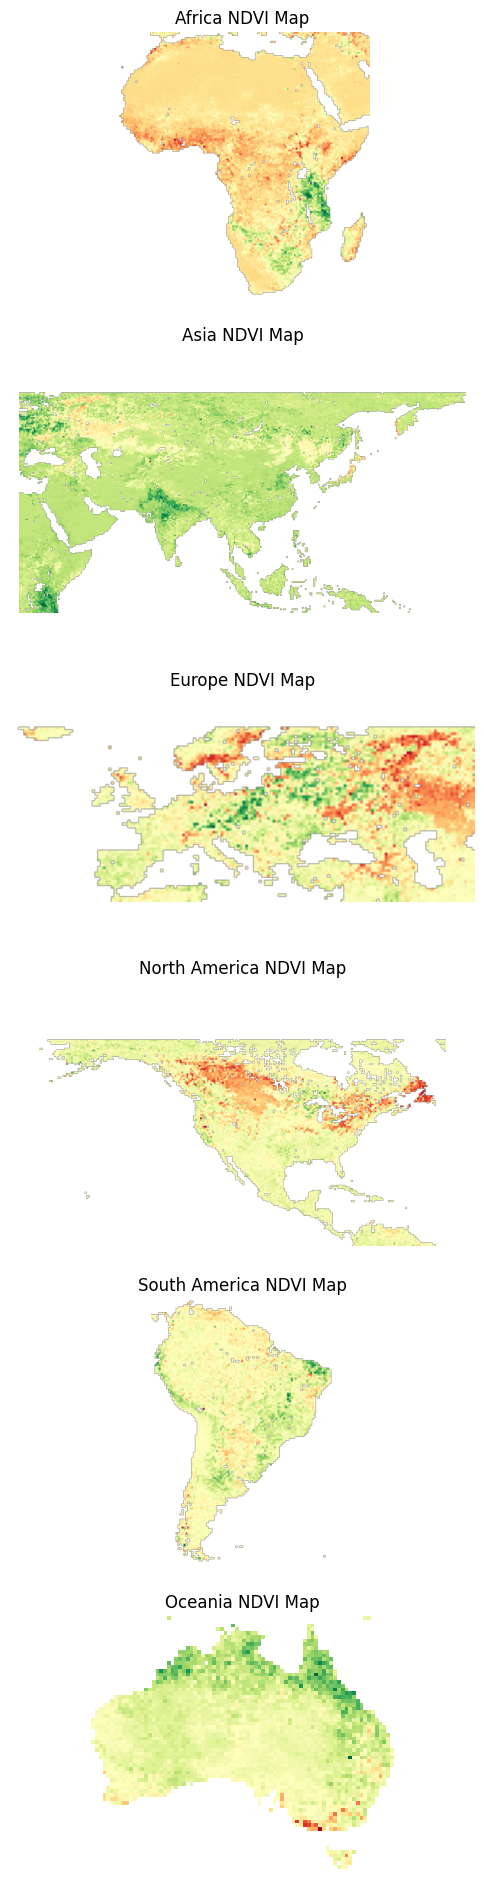

In [ ]:
fig, axes = plt.subplots(len(continents), 1, figsize=(6, 4 * len(continents)))

for i, (continent, ndvi_data) in enumerate(continents.items()):
    axes[i].imshow(ndvi_data, cmap='RdYlGn')
    axes[i].set_title(f"{continent} NDVI Map")
    axes[i].axis('off')  


In [ ]:
with rasterio.open(src_path) as src:
    pixel_width = abs(src.transform.a)
    pixel_height = abs(src.transform.e)
    approx_km2_per_pixel = (pixel_width * 111.0) * (pixel_height * 111.0)

# thresholds for loss and gain
loss_threshold = -0.1
gain_threshold = 0.1

# compute stats per continent
results = []
for name, arr in ndvi_by_continent.items():
    valid = ~np.isnan(arr)
    vals = arr[valid]
    
    mean_diff = float(vals.mean()) if vals.size else np.nan
    median_diff = float(np.median(vals)) if vals.size else np.nan
    
    loss_pixels = int((arr < loss_threshold).sum())
    gain_pixels = int((arr > gain_threshold).sum())
    
    loss_km2 = loss_pixels * approx_km2_per_pixel
    gain_km2 = gain_pixels * approx_km2_per_pixel
    
    results.append({
        "continent": name.replace("_2025", ""),  # clean up name
        "mean_ndvi_diff": mean_diff,
        "median_ndvi_diff": median_diff,
        "valid_pixels": int(valid.sum()),
        "loss_pixels": loss_pixels,
        "gain_pixels": gain_pixels,
        "loss_km2_approx": float(loss_km2),
        "gain_km2_approx": float(gain_km2)
    })

df_stats = pd.DataFrame(results)
print(df_stats)

       continent  mean_ndvi_diff  median_ndvi_diff  valid_pixels  loss_pixels  \
0         Africa        0.017691             0.000         11439          439   
1           Asia       -0.013421            -0.004         22847         3100   
2         Europe       -0.031270            -0.012          6139         1562   
3  North_America       -0.068999            -0.028          9468         2379   
4  South_America        0.017816             0.008          6083          311   
5      Australia        0.045020             0.031          2759           56   

   gain_pixels  loss_km2_approx  gain_km2_approx  
0         1195       1352229.75       3680898.75  
1         1882       9548775.00       5797030.50  
2          850       4811350.50       2618212.50  
3          301       7327914.75        927155.25  
4          799        957957.75       2461119.75  
5          511        172494.00       1574007.75  


In [36]:
from scipy.stats import wilcoxon
nodata_val = 99999

mask = (
    (ndvi_2005 != nodata_val) &
    (ndvi_2025 != nodata_val) &
    (~np.isnan(ndvi_2005)) &
    (~np.isnan(ndvi_2025)) &
    (ndvi_2005 >= -1) & (ndvi_2005 <= 1) &
    (ndvi_2025 >= -1) & (ndvi_2025 <= 1)
)

ndvi1_valid = ndvi_2005[mask].flatten()
ndvi2_valid = ndvi_2025[mask].flatten()
stat, p_value = wilcoxon(ndvi1_valid, ndvi2_valid)

print("Wilcoxon Statistic:", stat)
print("P-value:", p_value)


Wilcoxon Statistic: 521553083.5
P-value: 2.7291282046602035e-81


In [37]:
ndvi_diff = ndvi2_valid - ndvi1_valid
print("Mean NDVI change:", np.mean(ndvi_diff))
print("Median NDVI change:", np.median(ndvi_diff))


Mean NDVI change: -0.012076431683035906
Median NDVI change: -0.003999993205070496


np.float64(-0.10000000149011612)